# Sentiment Analysis



In [1]:
# Import necessary libraries and load the cleaned data
import pandas as pd
df_clean = pd.read_csv("../data/SPOTIFY_REVIEWS_tokens.csv")

### Sentiment Analyzer

The VADER sentiment analysis tool was chosen for its demonstrated effectiveness on short, informal textual data, aligning with the nature of our social media and review corpus. 

In [2]:
# Initialize NLTK's Sentiment Intensity Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

For a unified sentiment classification, we relied on VADER's compound score, which offers a single, interpretable measure of overall sentiment direction and intensity. 

In [3]:
# Apply sentiment analysis to posts
df_senti = df_clean[df_clean['length_type'].isin(['Medium', 'Long'])].copy()
df_senti['sentiment'] = df_senti['review_text'].apply(
    lambda text: sia.polarity_scores(str(text))['compound']
)

### Basic Statistics on Sentiment Score

In [4]:
# Display sentiment statistics
df_senti['sentiment'].describe().apply(lambda x: f"{x:.4f}")

count    785600.0000
mean          0.2514
std           0.5359
min          -0.9994
25%          -0.1226
50%           0.3753
75%           0.7264
max           0.9990
Name: sentiment, dtype: object

In [5]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

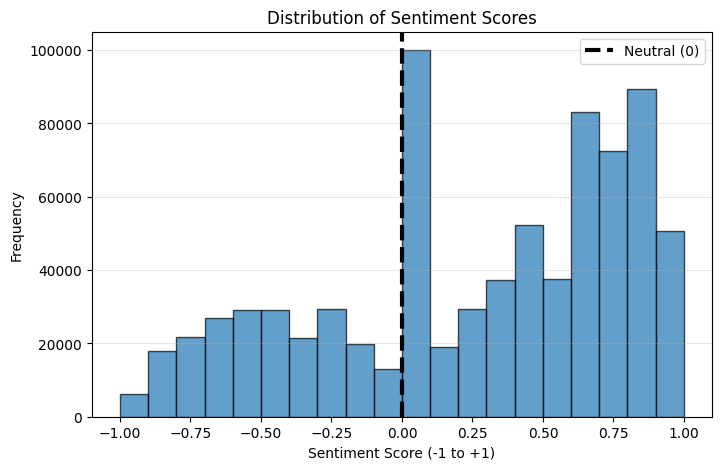

In [6]:
# Visualize the distribution of sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(df_senti['sentiment'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=3, label='Neutral (0)')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to +1)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

The continuous sentiment scores is then transformed into interpretable qualitative categories. By using thresholds at –0.1 and 0.1, the code below classifies scores below –0.1 as **Negative**, between –0.1 and 0.1 as **Neutral**, and above 0.1 as **Positive**. These cutoffs create a distinction between clearly negative, neutral, and positive sentiments while reducing noise from minor score fluctuations around zero. 

In [7]:
# Create sentiment categories
df_senti['sentiment_category'] = pd.cut(df_senti['sentiment'], 
                                       bins=[-1, -0.1, 0.1, 1], 
                                       labels=['Negative', 'Neutral', 'Positive'])

### Visualizations

#### Sentiment Score vs. Review Rating

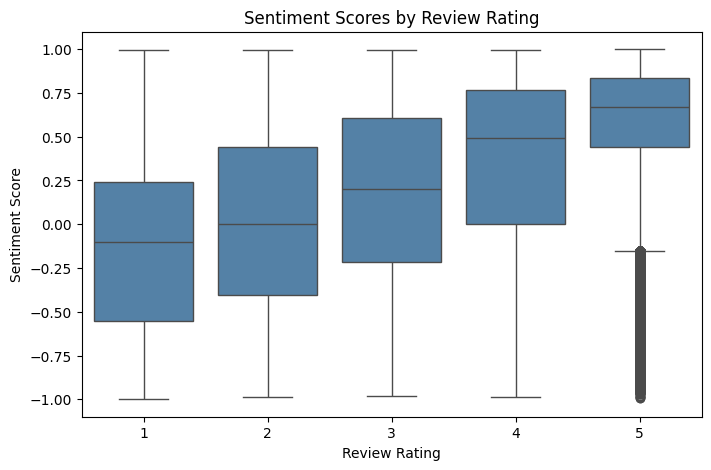

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_senti[df_senti['review_rating'] != 0], x='review_rating', y='sentiment', color='steelblue')
plt.title('Sentiment Scores by Review Rating')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Review Rating')
plt.ylabel('Sentiment Score')
plt.show()

#### Sentiment Category vs. Review Rating

In [9]:
# Create pivot table
df_senti_stacked = pd.crosstab(
    df_senti[df_senti['review_rating'] != 0]['review_rating'], 
    df_senti[df_senti['review_rating'] != 0]['sentiment_category'], 
    normalize='index'
)

<Figure size 1000x600 with 0 Axes>

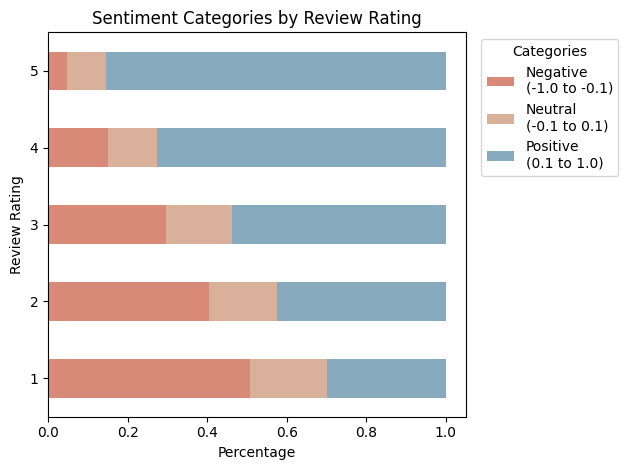

In [10]:
# Plot stacked bar chart for sentiment categories
plt.figure(figsize=(10, 6))
df_senti_stacked.plot(kind='barh', stacked=True, color=['#D98977', '#D9B19A', '#88AABF'])
plt.title('Sentiment Categories by Review Rating')
plt.ylabel('Review Rating')
plt.xlabel('Percentage')
plt.legend(['Negative\n(-1.0 to -0.1)', 
            'Neutral\n(-0.1 to 0.1)', 
            'Positive\n(0.1 to 1.0)'],
           title='Categories',
           loc='upper left',
           bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()